### Data Frames are type of Data Structures in pandas which enable us to read and Analyse our data in tabular format

In [2]:
import pandas  as pd
import matplotlib

In [3]:
# Downloading a CSV of Covid Data in Italy 
from urllib.request import urlretrieve
italy_covid_url ='https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

In [4]:
# Downloading the file on the local machine 
urlretrieve(italy_covid_url,'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x1bcccab23c0>)

In [5]:
# All the csv's file can be read using the read_csv --> Function in pandas and can be stored a dataframe in pandas 
#  Not that pandas by default labels inputs which are not available as NaN
# There is a difference between Nan & 0
# df --> represents a variable as a DataFrame 
covid_df= pd.read_csv('italy-covid-daywise.csv')
print(type(covid_df))

<class 'pandas.core.frame.DataFrame'>


In [6]:
print(covid_df)

           date  new_cases  new_deaths  new_tests
0    2019-12-31        0.0         0.0        NaN
1    2020-01-01        0.0         0.0        NaN
2    2020-01-02        0.0         0.0        NaN
3    2020-01-03        0.0         0.0        NaN
4    2020-01-04        0.0         0.0        NaN
..          ...        ...         ...        ...
243  2020-08-30     1444.0         1.0    53541.0
244  2020-08-31     1365.0         4.0    42583.0
245  2020-09-01      996.0         6.0    54395.0
246  2020-09-02      975.0         8.0        NaN
247  2020-09-03     1326.0         6.0        NaN

[248 rows x 4 columns]


#### Different functions available in pandas help us to control this data frame

In [7]:
# Using the info method --> Find organiced data about data (Meta-Data)--> Summary of our Data Frame
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


##### Above Data Shows in Case of new_tests out of total entries only 135 are non null (not-Nan) others are 
#### and date is of type String --> Object

In [8]:
#Using the df.head() or df.tails() you can by-default access first 5 rows or bottom 5 rows of the given data set 
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [9]:
covid_df.tail()

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [10]:
#df.decribe() --> Gives us the different parameters such as median , mean , mode ,etc of the given data 
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


<Axes: >

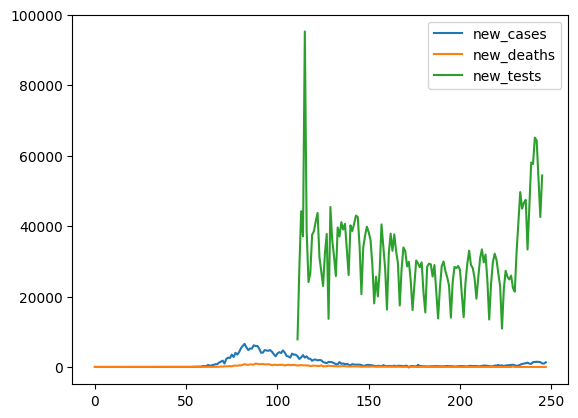

In [11]:
covid_df.plot()

In [12]:
# The .columns properties returns all the columns as a list --> Including their data types 
covid_df.columns
print(type(covid_df.columns))

<class 'pandas.core.indexes.base.Index'>


In [13]:
#  . shape property returns a tuple containing the (rows,columns)
covid_df.shape

(248, 4)

## Retrieving data from a data frame

The first thing you might want to do is retrieve data from this data frame, e.g., the counts of a specific day or the list of values in a particular column. To do this, it might help to understand the internal representation of data in a data frame. Conceptually, you can think of a dataframe as a dictionary of lists: keys are column names, and values are lists/arrays containing data for the respective columns. 

In [14]:

covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

In [15]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [16]:
# Retrieving Data of a given coloumn
covid_df['date']

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [17]:
# type of data which is returned on using the indexing method for a Gven dataframe 
print(type(covid_df['date']))
# The dtype is Series in Pandas 

<class 'pandas.core.series.Series'>


Like arrays, you can retrieve a specific value with a series using the indexing notation `[]`.

In [18]:
covid_df['new_cases'][122]
# In order to retrieve selected data in a given cell

np.float64(1872.0)

In [19]:
# Another method at is present which helps in information retreival 
# covid_df.at[row,column] --> Syntax
covid_df.at[122,'new_cases']

np.float64(1872.0)

Further, you can also pass a list of columns within the indexing notation `[]` to access a subset of the data frame with just the given columns.

**Analysing the Data from Data Frames**

In [20]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [26]:
death_ratio = covid_df.new_deaths.sum()/covid_df.new_cases.sum()
print(death_ratio*100,"%")

13.073679170579894 %


In [23]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [27]:
postive_rate=covid_df.new_cases.sum()/covid_df.new_tests.sum()
print(postive_rate*100,"%")

6.344614829548428 %


**Querying and Sorting Rows**

Let's say we want only want to look at the days which had more than 1000 reported cases. We can use a boolean expression to check which rows satisfy this criterion.

In [29]:
upper_limit_cases= covid_df.new_cases>1000
print(type(upper_limit_cases))

<class 'pandas.core.series.Series'>


In [30]:
print(upper_limit_cases)

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool


In [31]:
# Number of true counts --> 0 and 1 
print(f'The number of such patients are : {upper_limit_cases.sum()}')

The number of such patients are : 72


In [33]:
#  Displaying the Data :-
# covid_df[test_equation ] --> Syntax 
covid_df[upper_limit_cases]


,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


The data frame contains 72 rows, but only the first & last five rows are displayed by default with Jupyter for brevity. We can change some display options to view all the rows.

In [34]:
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [36]:
# Using the Sample Method to get the sense of the Data which is being handled 
upper_limit_cases.sample

<bound method NDFrame.sample of 0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool>

In [46]:
#  Determining the Days on which the Positivity rate where higher than usual
# Generating a Series Consisting of Higher Rates that the total Average of the dataset
hu_positive_rate=(covid_df.new_cases/covid_df.new_tests) > postive_rate 
# Trnaforming to a Seires rather than a Data Type 
print(hu_positive_rate)


0      False
1      False
2      False
3      False
4      False
       ...  
243    False
244    False
245    False
246    False
247    False
Length: 248, dtype: bool


**Adding New Column to the DataSet**
##### covid\_df\['positive\_rate'\] = covid\_df.new\_cases / covid\_df.new\_tests

In [45]:
# Calculating the growth as compared to the overall data set 
# Creating a series having the series which contains the difference between the both operators 
# and adding this to the consisting data frame 
covid_df['relative_growth']=hu_positive_rate-postive_rate


In [47]:
print(covid_df)

           date  new_cases  new_deaths  new_tests  relative_growth
0    2019-12-31        0.0         0.0        NaN        -0.063446
1    2020-01-01        0.0         0.0        NaN        -0.063446
2    2020-01-02        0.0         0.0        NaN        -0.063446
3    2020-01-03        0.0         0.0        NaN        -0.063446
4    2020-01-04        0.0         0.0        NaN        -0.063446
..          ...        ...         ...        ...              ...
243  2020-08-30     1444.0         1.0    53541.0        -0.063446
244  2020-08-31     1365.0         4.0    42583.0        -0.063446
245  2020-09-01      996.0         6.0    54395.0        -0.063446
246  2020-09-02      975.0         8.0        NaN        -0.063446
247  2020-09-03     1326.0         6.0        NaN        -0.063446

[248 rows x 5 columns]


In [48]:
# Dropping the Columns From pandas 
covid_df= covid_df.drop('relative_growth',axis=1)

In [50]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


## Importance of Metadata 
**It is very Important to properly analyse the the data and its correlation with other Data before drawing some relation . As those realtions might not always be true**


However, keep in mind that sometimes it takes a few days to get the results for a test, so we can't compare the number of new cases with the number of tests conducted on the same day. Any inference based on this `positive_rate` column is likely to be incorrect. It's essential to watch out for such subtle relationships that are often not conveyed within the CSV file and require some external context. It's always a good idea to read through the documentation provided with the dataset or ask for more information.

For now, let's remove the `positive_rate` column using the `drop` method.

# Using the Concept of Inplace Parameter 
`covid_df=covid_df.drop('relative_growth')`
`covid_df.drop('relative_growth',inplace=True)`

In [ ]:
#  Inplace = True applies without creating object to the main data frame 
#  Inplace = False applies just shows the results without actually applying this information

`to_csv()`
**To write data to C.S.V Format**

**Sorting of Rows using the Columns Values**